In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets


# Functions

In [8]:
def hsv_threshold(image, lower_h, upper_h, lower_s, upper_s, lower_v, upper_v):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([lower_h, lower_s, lower_v], dtype=np.uint8)
    upper_bound = np.array([upper_h, upper_s, upper_v], dtype=np.uint8)
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    result = cv2.bitwise_and(image, image, mask=mask)

    return result


def threshold_channel_range(channel, lower, upper):
    # Apply range threshold
    mask = cv2.inRange(channel, lower, upper)
    return mask

def plot_thresholds(lower_r, upper_r, lower_g, upper_g, lower_b, upper_b):
    # Threshold each channel within the specified range
    R_thresh = threshold_channel_range(R, lower_r, upper_r)
    G_thresh = threshold_channel_range(G, lower_g, upper_g)
    B_thresh = threshold_channel_range(B, lower_b, upper_b)

    # Display the results
    plt.figure(figsize=(30, 10))
    
    plt.subplot(1, 3, 1)
    plt.title("Red Channel")
    plt.imshow(R_thresh, cmap='gray')
    plt.axis('off')
    
    # plt.subplot(1, 3, 2)
    # plt.title("Green Channel")
    # plt.imshow(G_thresh, cmap='gray')
    # plt.axis('off')
    
    # plt.subplot(1, 3, 3)
    # plt.title("Blue Channel")
    # plt.imshow(B_thresh, cmap='gray')
    # plt.axis('off')
    
    plt.show()

def plot_threshold(image, lower, upper):
    # Threshold each channel within the specified range
    image_thresh = threshold_channel_range(image, lower, upper)

    # Display the results
    plt.figure(figsize=(45, 15))
    
    plt.subplot(1, 3, 1)
    plt.title("Red Channel")
    plt.imshow(image_thresh, cmap='gray')
    plt.axis('off')

def plot_image(img, figsize=(45, 15)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Initial Testing

In [20]:

# Read the image
image = cv2.imread('calibration_color/cam1.jpg')


image = hsv_threshold(image, 0,180,96,255,0,125)

# Split the image into its color channels
B, G, R = cv2.split(image)



# Create interactive sliders for lower and upper bounds
lower_r_slider = IntSlider(min=1, max=255, step=1, value=50, description='Lower Red')
upper_r_slider = IntSlider(min=1, max=255, step=1, value=200, description='Upper Red')

lower_g_slider = IntSlider(min=1, max=255, step=1, value=50, description='Lower Green')
upper_g_slider = IntSlider(min=1, max=255, step=1, value=200, description='Upper Green')

lower_b_slider = IntSlider(min=1, max=255, step=1, value=50, description='Lower Blue')
upper_b_slider = IntSlider(min=1, max=255, step=1, value=200, description='Upper Blue')

plot_threshold_channel = lambda lower_r, upper_r: plot_threshold(R, lower_r, upper_r)

interact(plot_threshold_channel, 
         lower_r=lower_r_slider, upper_r=upper_r_slider, 
        #  lower_g=lower_g_slider, upper_g=upper_g_slider, 
        #  lower_b=lower_b_slider, upper_b=upper_b_slider
        )


interactive(children=(IntSlider(value=50, description='Lower Red', max=255, min=1), IntSlider(value=200, descr…

<function __main__.<lambda>(lower_r, upper_r)>

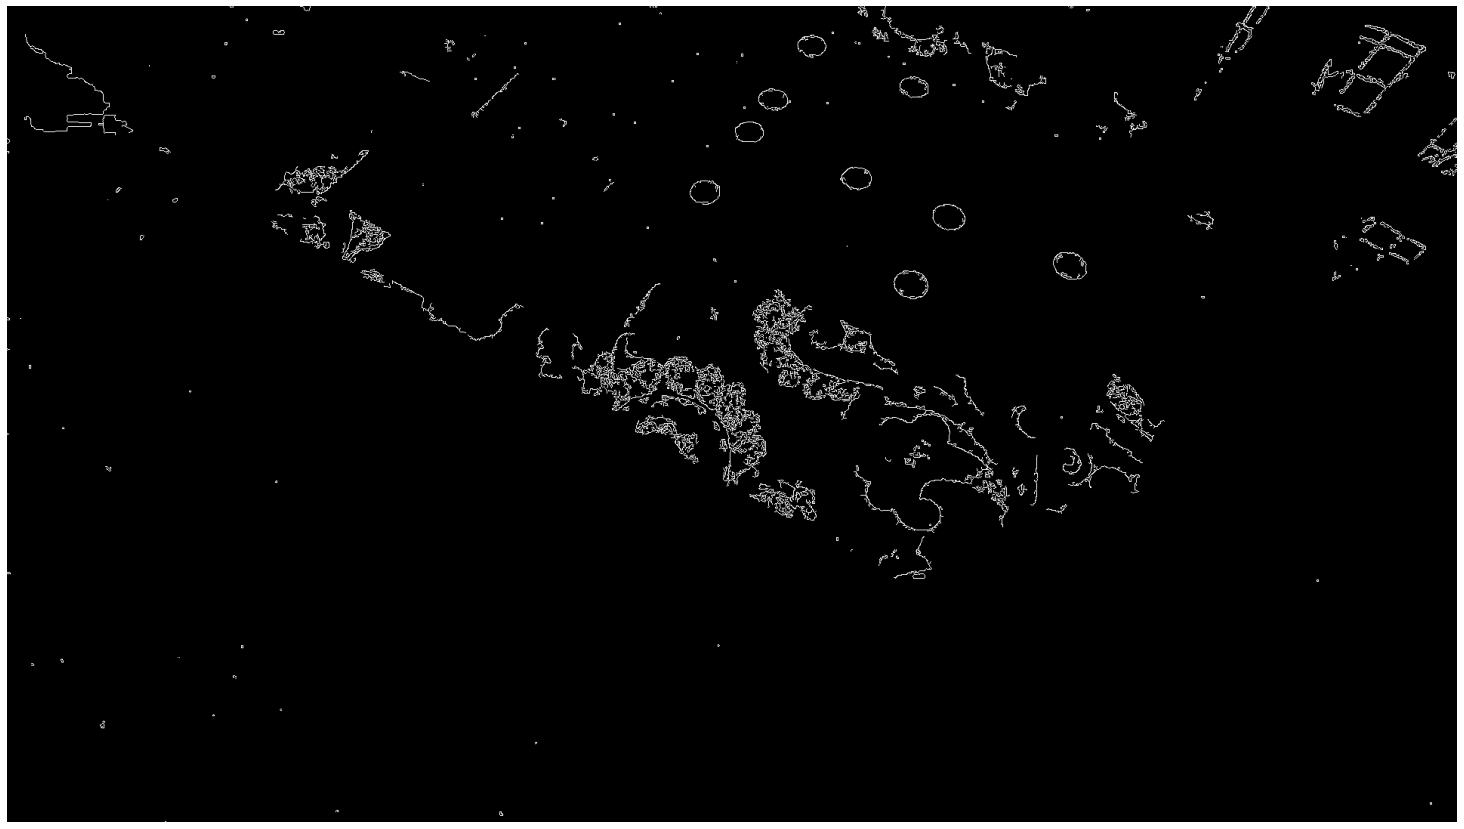

In [5]:
img = image
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(grey, 30, 200) 
contours,_ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 1)

plt.figure(figsize=(45, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [8]:

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

def plot_hsv_thresholds(lower_h, upper_h, lower_s, upper_s, lower_v, upper_v):
    lower_bound = np.array([lower_h, lower_s, lower_v], dtype=np.uint8)
    upper_bound = np.array([upper_h, upper_s, upper_v], dtype=np.uint8)
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    result = cv2.bitwise_and(image, image, mask=mask)
    plt.figure(figsize=(45, 15))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

lower_h_slider = IntSlider(min=1, max=180, step=1, value=0, description='Lower H')
upper_h_slider = IntSlider(min=1, max=180, step=1, value=180, description='Upper H')
lower_s_slider = IntSlider(min=1, max=255, step=1, value=0, description='Lower S')
upper_s_slider = IntSlider(min=1, max=255, step=1, value=255, description='Upper S')
lower_v_slider = IntSlider(min=1, max=255, step=1, value=0, description='Lower V')
upper_v_slider = IntSlider(min=1, max=255, step=1, value=255, description='Upper V')

interact(plot_hsv_thresholds, 
         lower_h=lower_h_slider, upper_h=upper_h_slider, 
         lower_s=lower_s_slider, upper_s=upper_s_slider, 
         lower_v=lower_v_slider, upper_v=upper_v_slider)

interactive(children=(IntSlider(value=0, description='Lower H', max=180), IntSlider(value=180, description='Up…

<function __main__.plot_hsv_thresholds(lower_h, upper_h, lower_s, upper_s, lower_v, upper_v)>

# Code

In [27]:
# Read the image
image = cv2.imread('calibration_color/cam1.jpg')


image = hsv_threshold(image, 0,180,96,255,0,125)

# Split the image into its color channels
B, G, R = cv2.split(image)

B_masked = threshold_channel_range(R, 36, 106)

B_masked = cv2.GaussianBlur(B_masked,(9,9),0)
kernel = np.array([[-2,-1,-1,-1,-2],
                    [-1,1,3,1,-1],
                    [-1,3,4,3,-1],
                    [-1,1,3,1,-1],
                    [-2,-1,-1,-1,-2]])
# B_masked = cv2.filter2D(B_masked, -1, kernel)
# B_masked = cv2.cvtColor(B_masked, cv2.COLOR_RGB2BGR)



# Find contours
contours, _ = cv2.findContours(B_masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def plot_area(min_area, max_area):
    # Filter contours by area
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area and cv2.contourArea(cnt) < max_area]

    # Create an empty mask
    mask = np.zeros_like(B_masked)

    # Draw the filtered contours on the mask
    cv2.drawContours(mask, filtered_contours, -1, 255, thickness=cv2.FILLED)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # # Save or display the result
    # cv2.imwrite('filtered_image.jpg', result)
    # # To display: cv2.imshow('Filtered Image', result); cv2.waitKey(0); cv2.destroyAllWindows()
    
    grey = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

    cnt,_ = cv2.findContours(grey, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    result = cv2.drawContours(result, cnt, -1, (0,255,0), 1)

    plot_image(result)

lower_area_slider = IntSlider(min=500, max=10000, step=1, value=1000, description='Lower H')
upper_area_slider = IntSlider(min=1000, max=10000, step=1, value=10000, description='Upper H')


interact(plot_area, 
         min_area=lower_area_slider, max_area=upper_area_slider)

interactive(children=(IntSlider(value=1000, description='Lower H', max=10000, min=500), IntSlider(value=10000,…

<function __main__.plot_area(min_area, max_area)>